In [21]:
import gist
from PIL import Image
import imageio

import sys
sys.path.append("../Library/")
import image_download as imd
import image_manipulation as ima

from dotenv import load_dotenv
import os
load_dotenv("../.env")

import numpy as np
import db_connection

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Set Parameters

In [34]:
# parameters
zoom = 15
lat = 30.4131736
lon = -87.600026
pixels = 640
samples_per_location = 10
precision = 4
num_images = 4
GMAPS_API_KEY = os.getenv('GMAPS_API_KEY')
IMG_FOLDER = os.getenv('MFP_IMG_FOLDER')

# image dimensions
meters_per_px = imd.zoom_in_meters_per_pixel(zoom, lat)
image_size = meters_per_px*pixels ## in meters

print("Meters per pixel:", round(meters_per_px,2))
print("Image size:", round(image_size,2), "in meters")

Meters per pixel: 4.12
Image size: 2636.76 in meters


### Download Several Images From One Region

In [35]:
locations = [
    {"name": "New York", "lat": 40.729, "lon": -73.992},
    {"name": "Washington", "lat": 38.918, "lon": -77.046},
    {"name": "Los Angeles", "lat": 34.038, "lon": -117.911},
    {"name": "Chicago", "lat": 41.978, "lon": -87.671},
    {"name": "Houston", "lat": 29.761, "lon": -95.361},
    {"name": "Boston", "lat": 42.373, "lon": -71.057},
    {"name": "Sydney", "lat": -33.808, "lon": 151.17},
    {"name": "Ottawa", "lat": 45.425, "lon": -75.679},
    {"name": "Toronto", "lat": 43.674, "lon": -79.39},
    {"name": "Montreal", "lat": 45.551, "lon": -73.635},
    {"name": "Barcelona", "lat": 41.39, "lon": 2.174},
    {"name": "Madrid", "lat": 40.424, "lon": -3.702},
]

In [36]:
# Image Download Defined Locations around center lat/lon
images, metadata = imd.download_images_defined_location(locations, 
                                                        zoom, 
                                                        pixels,
                                                        center = True, 
                                                        xy_to_ij = True, 
                                                        num_images = num_images,
                                                        api_key = GMAPS_API_KEY,
                                                        img_folder = IMG_FOLDER,
                                                        distance_factor=2,
                                                        save_image=True)

# Image Download Gaussian Distributed Locations
#images, metadata = imd.download_images_random_location(locations, 
#                                                       zoom, 
#                                                       pixels,
#                                                       samples_per_location,
#                                                       precision,
#                                                       api_key = GMAPS_API_KEY,
#                                                       img_folder = IMG_FOLDER, 
#                                                       save_image=True)

DB Credentials from file
DB connected successfully!!!
Saving images of New York...
Saving images of Washington...
Saving images of Los Angeles...
Saving images of Chicago...
Saving images of Houston...
Saving images of Boston...
Saving images of Sydney...
Saving images of Ottawa...
Saving images of Toronto...
Saving images of Montreal...
Saving images of Barcelona...
Saving images of Madrid...


### Get filenames of all the files in Google Drive that correspond to Madrid

In [38]:
fnames = ima.get_filenames_of_city('Madrid', IMG_FOLDER)
fnames

['Madrid_40.44490861679794_-3.7843974490476695_15_640.png',
 'Madrid_40.36127414960618_-3.6745341836507768_15_640.png',
 'Madrid_40.40309138320206_-3.7843974490476695_15_640.png',
 'Madrid_40.48672585039382_-3.7843974490476695_15_640.png',
 'Madrid_40.36127414960618_-3.6196025509523304_15_640.png',
 'Madrid_40.40309138320206_-3.729465816349223_15_640.png',
 'Madrid_40.48672585039382_-3.6745341836507768_15_640.png',
 'Madrid_40.40309138320206_-3.6745341836507768_15_640.png',
 'Madrid_40.44490861679794_-3.6196025509523304_15_640.png',
 'Madrid_40.36127414960618_-3.7843974490476695_15_640.png',
 'Madrid_40.48672585039382_-3.6196025509523304_15_640.png',
 'Madrid_40.48672585039382_-3.729465816349223_15_640.png',
 'Madrid_40.44490861679794_-3.729465816349223_15_640.png',
 'Madrid_40.44490861679794_-3.6745341836507768_15_640.png',
 'Madrid_40.40309138320206_-3.6196025509523304_15_640.png',
 'Madrid_40.36127414960618_-3.729465816349223_15_640.png']

### Get image info of all the files of Madrid (filenames, images, np.array)

In [47]:
images_info = ima.load_images_from_gdrive(fnames, IMG_FOLDER)

In [48]:
img_idx = 0
images_info[img_idx]['fname']

'Madrid_40.44490861679794_-3.7843974490476695_15_640.png'

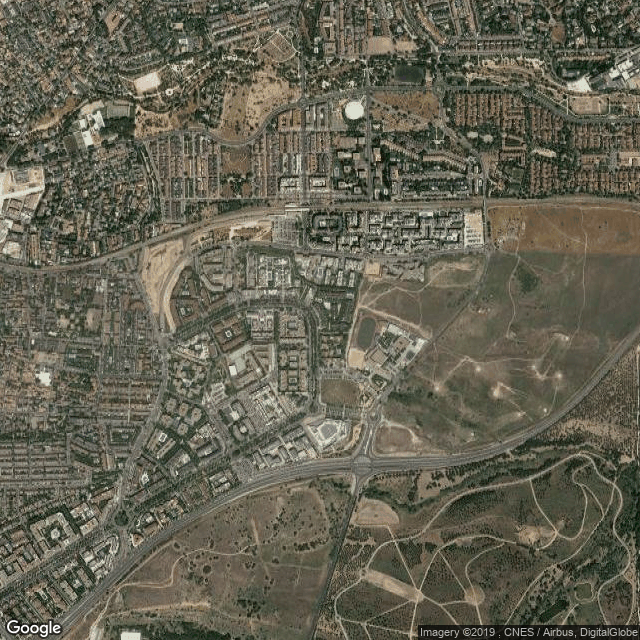

In [49]:
images_info[img_idx]['image']

### Label image in Database

In [46]:
ima.label_image(images_info[img_idx]['fname'], label = 3)

DB Credentials from file
DB connected successfully!!!
Image with filename Madrid_40.44490861679794_-3.7843974490476695_15_640.png was labelled with 3
